# Alternate Eco

Typical of late-game metas in battles 2 is the preference of alt-eco. Alt-eco towers offer the best of both worlds, allowing players to wield the power of pure eco comps while retaining some degree of the level of wealth had when playing farm strats. The battles 2 eco sim supports the functionality of the following alt-eco's:
1. Boat farms
2. Supply Drops
3. Druid Farms
4. Heli Farms

For items 2-4, the eco simulator has the ability to automate the process of purchasing, allowing the user to simulate alt-eco money generation in a way similar to how they might think about it in a typical battles 2 game.

In [1]:
import b2sim as b2
import copy

## Druid Farms & Automatic Purchases

Typically, games that go late with druid eco lead to many druid farms filling the screen. One way to replicate this behavior in the eco sim is to repeatedly place `buyDruidFarm` actions in the buy queue, but a better way to handle this is to place a single `repeatedlyBuyDruidFarms` action with a designated start and finish time during which the simulator will buy druid farms whenever it sees it has the money to do so. In this example, we walk through the uninterrupted generation of money from the start of round 20 to the start of round 26.

,Time,Type,Message
0,474.1,Eco,Change eco to Grouped Pinks
1,474.2,Buy,Trigger repeated druid farm buys until time 788.0
2,486.4,Round,Round 21.0 start
3,504.5,Round,Round 22.0 start
4,535.9,Round,Round 23.0 start
5,550.0,Round,Round 24.0 start
6,611.9,Round,Round 25.0 start
7,652.8,Round,Round 26.0 start
8,652.8,Eco,Change eco to Zero


The current cash and eco are (3911.200000000992,3828.8000000000693)
We currently have 10 druid farms


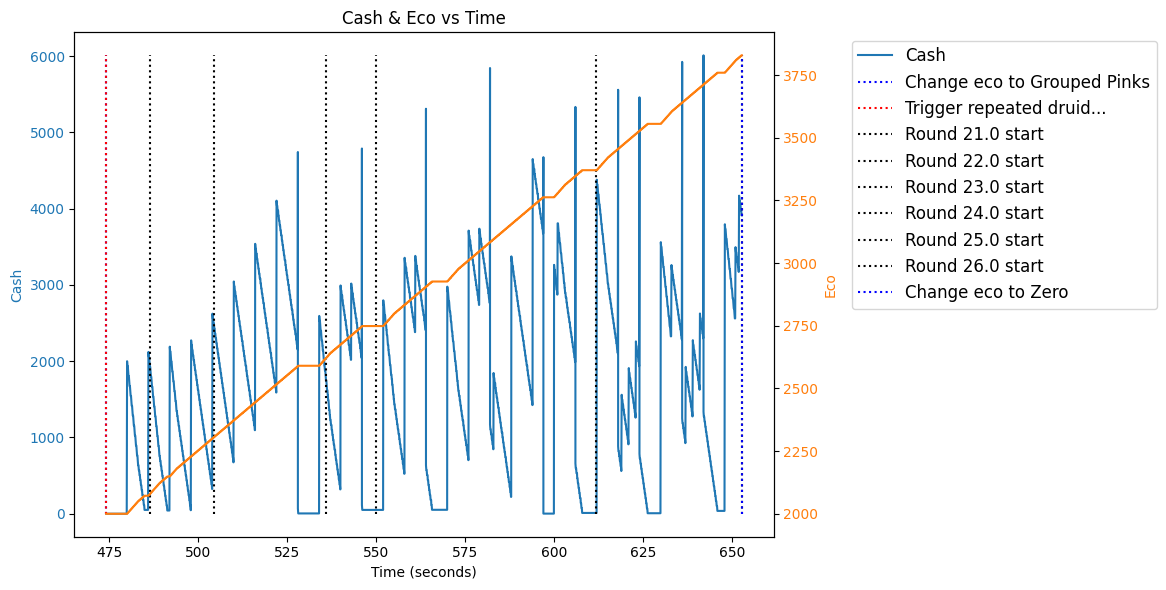

In [4]:
rounds = b2.Rounds(0.25)

buy_queue = [
    [b2.repeatedlyBuyDruidFarms(min_buy_time = rounds.getTimeFromRound(20), max_buy_time = rounds.getTimeFromRound(30))]
]

eco_queue = [
    b2.ecoSend(rounds.getTimeFromRound(26), 'Zero')
]

initial_state_game = {
    'Cash': 0,
    'Eco': 2000,
    'Eco Send': b2.ecoSend(send_name = 'Grouped Pinks'),
    'Rounds': rounds,
    'Game Round': 20,
    'Buy Queue': copy.deepcopy(buy_queue),
    'Eco Queue': copy.deepcopy(eco_queue)
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 26)
game_state.viewCashEcoHistory()
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
print("We currently have %s druid farms"%(len(game_state.druid_farms)))
b2.writeLog(game_state.logs, filename = 'dsg_druid_farming')

# Sniper Farming With CBSS

We map out the sniper farming flowchart with Churchill Boomerang Spike Sniper. In this flowchart, we hard save for E-sniper starting on R13, and then proceed to aggressively sniper farm afterwards.

,Time,Type,Message
0,282.4,Eco,Change eco to Zero
1,302.4,Round,Round 14.0 start
2,316.1,Round,Round 15.0 start
3,324.0,Buy,"Buy Defense, Buy supply drop"
4,335.1,Round,Round 16.0 start
5,369.0,Round,Round 17.0 start
6,388.6,Eco,Change eco to Grouped Pinks
7,408.2,Round,Round 18.0 start
8,434.4,Round,Round 19.0 start
9,470.8,Round,Round 20.0 start


The current cash and eco are (3290.6000000020167,3727.600000000101)
We currently have 6 supply drops on screen


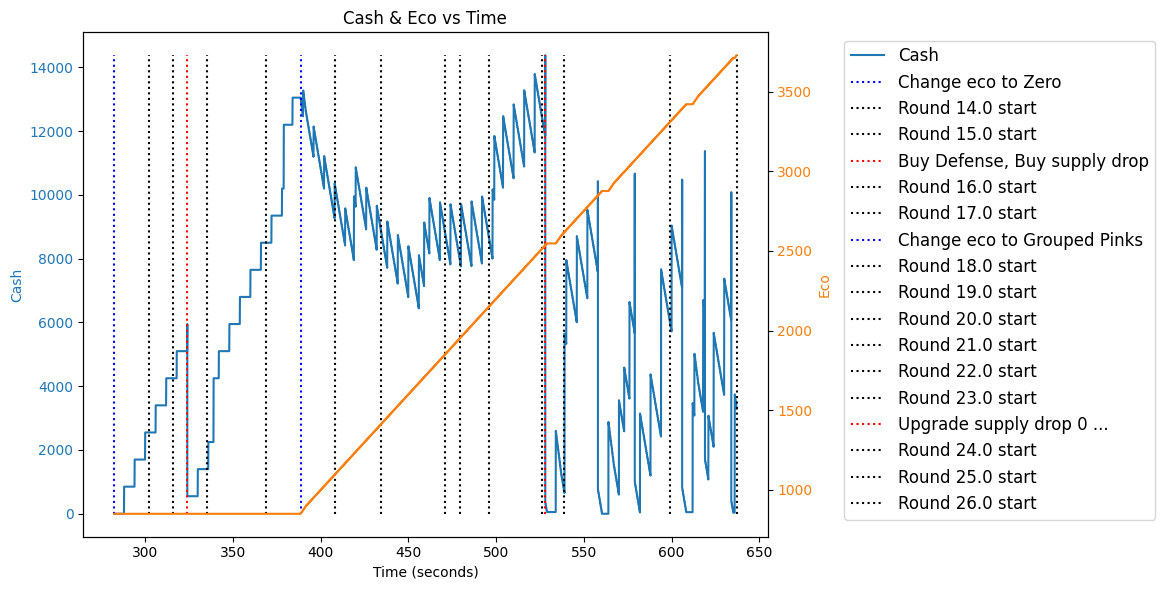

In [5]:
rounds = b2.Rounds([(0,0.25), (17,0.1)])

buy_queue = [
    [b2.buyDefense(-4250), b2.buySupplyDrop()], #Buy the supply drop, assuming we already have a 230 sniper on screen
    [b2.buyEliteSniper(0)], #Update the sniper farm at index 0 to an elite sniper
    [b2.repeatedlyBuySupplyDrops(max_buy_time = rounds.getTimeFromRound(26))] #Repeatedly buy supply drops until the specified end tiemme
]

eco_queue = [
    b2.ecoSend(rounds.getTimeFromRound(17.5), 'Grouped Pinks')
]

initial_state_game = {
    'Cash': 0,
    'Eco': 850,
    'Eco Send': b2.ecoSend(send_name = 'Zero'),
    'Rounds': rounds,
    'Game Round': 13,
    'Buy Queue': copy.deepcopy(buy_queue),
    'Eco Queue': copy.deepcopy(eco_queue)
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 26)
game_state.viewCashEcoHistory()
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
print("We currently have %s supply drops on screen"%(len(game_state.supply_drops)))
b2.writeLog(game_state.logs, filename = 'cbss_farming')